In [ ]:
from google.colab import files
uploaded = files.upload()

Saving volume study.xlsx to volume study.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("Copy of Driver_1(1).xlsx")  # Replace with your filename
df.columns = df.columns.str.strip().str.replace(" ", "_")  # Clean names
print(df.columns.tolist())  # Confirm correct names

['Speed', 'Long_Acc', 'Lat_Acc', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate', 'Radius_of_turn', 'Latitude', 'Longitude']


In [ ]:
df.head()

,Speed(Km/hr),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,1.03,0.1962,-0.2943,-1.065,-0.133,-0.545,0.31,25°32.043560 N,84°51.020380 E
1,1.22,0.7848,-0.2943,-1.200,-0.013,-0.736,0.34,25°32.043600 N,84°51.020380 E
2,1.17,0.1962,-0.4905,-1.498,-0.028,-0.625,0.27,25°32.043620 N,84°51.020380 E
3,1.20,0.3924,-0.0981,-2.156,0.077,-0.001,0.83,25°32.043640 N,84°51.020390 E
4,1.30,-0.2943,-0.2943,-2.600,-0.260,-0.452,0.90,25°32.043690 N,84°51.020380 E


In [ ]:
import numpy as np

df['Speed(Km/hr)'] = pd.to_numeric(df['Speed(Km/hr)'], errors='coerce') * (1000 / 3600)
for col in ['Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']:
    df[col] = pd.to_numeric(df[col], errors='coerce') * (np.pi / 180)

In [ ]:
df.head()

,Speed(Km/hr),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,0.286111,0.1962,-0.2943,-0.018588,-0.002321,-0.009512,0.31,25°32.043560 N,84°51.020380 E
1,0.338889,0.7848,-0.2943,-0.020944,-0.000227,-0.012846,0.34,25°32.043600 N,84°51.020380 E
2,0.325000,0.1962,-0.4905,-0.026145,-0.000489,-0.010908,0.27,25°32.043620 N,84°51.020380 E
3,0.333333,0.3924,-0.0981,-0.037629,0.001344,-0.000017,0.83,25°32.043640 N,84°51.020390 E
4,0.361111,-0.2943,-0.2943,-0.045379,-0.004538,-0.007889,0.90,25°32.043690 N,84°51.020380 E


In [ ]:
print("Number of columns in df:", df.shape[1])

Number of columns in df: 9


In [ ]:
print(df.shape[0])

147564


In [ ]:
df = df.interpolate().dropna()

/tmp/ipython-input-10-2411464756.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


In [ ]:
df.rename(columns={'Speed(Km/hr)': 'Speed(m/s)'}, inplace=True)

In [ ]:
df.head()

,Speed(m/s),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,0.286111,0.1962,-0.2943,-0.018588,-0.002321,-0.009512,0.31,25°32.043560 N,84°51.020380 E
1,0.338889,0.7848,-0.2943,-0.020944,-0.000227,-0.012846,0.34,25°32.043600 N,84°51.020380 E
2,0.325000,0.1962,-0.4905,-0.026145,-0.000489,-0.010908,0.27,25°32.043620 N,84°51.020380 E
3,0.333333,0.3924,-0.0981,-0.037629,0.001344,-0.000017,0.83,25°32.043640 N,84°51.020390 E
4,0.361111,-0.2943,-0.2943,-0.045379,-0.004538,-0.007889,0.90,25°32.043690 N,84°51.020380 E


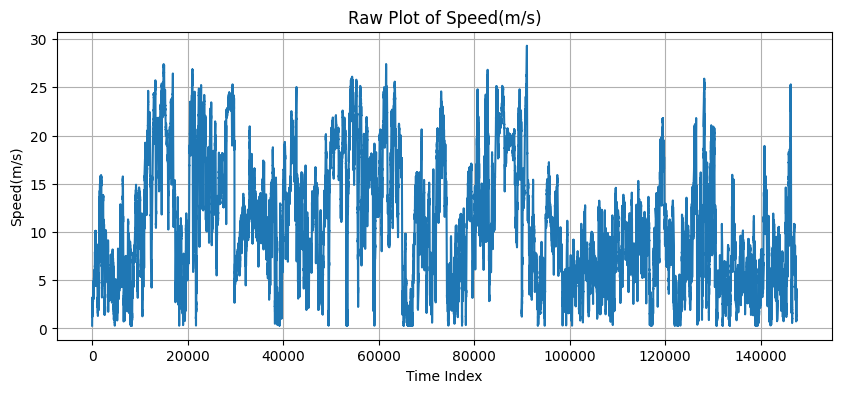

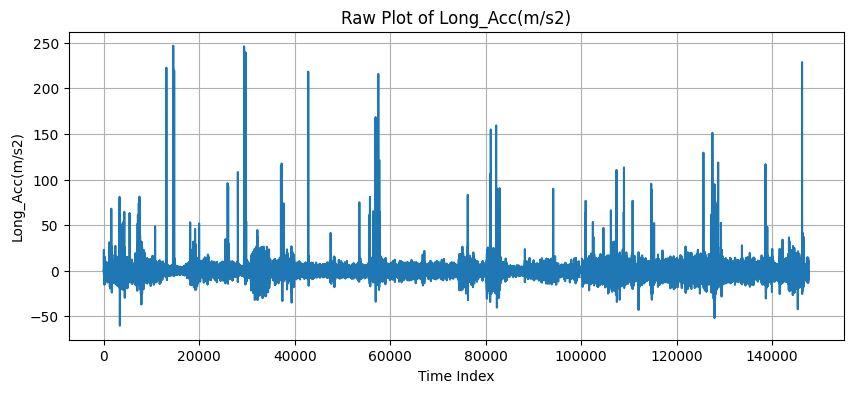

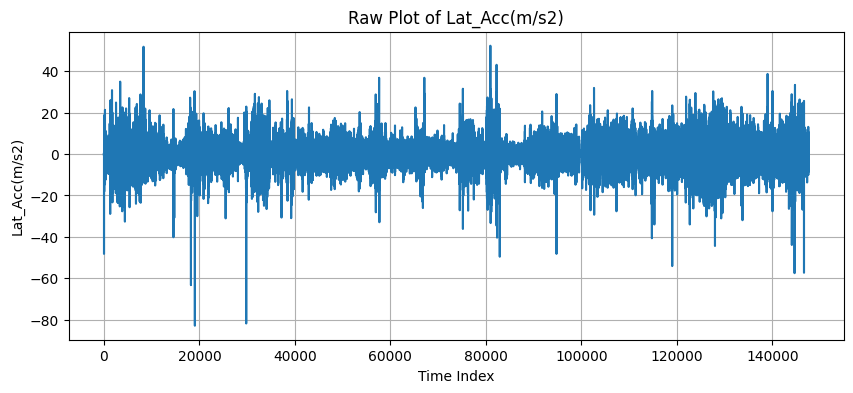

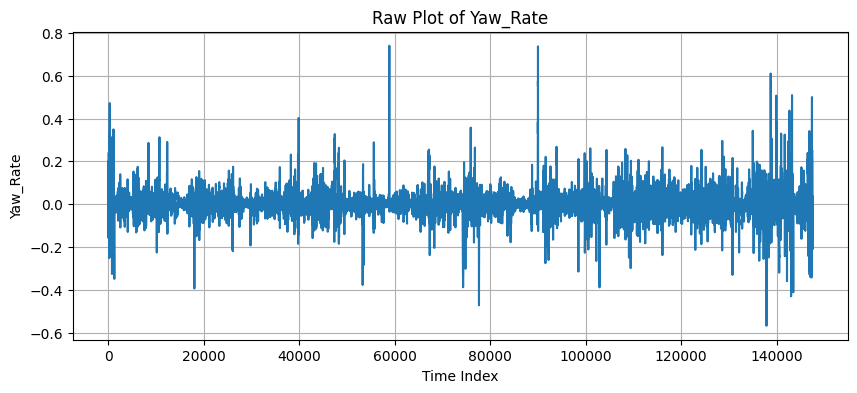

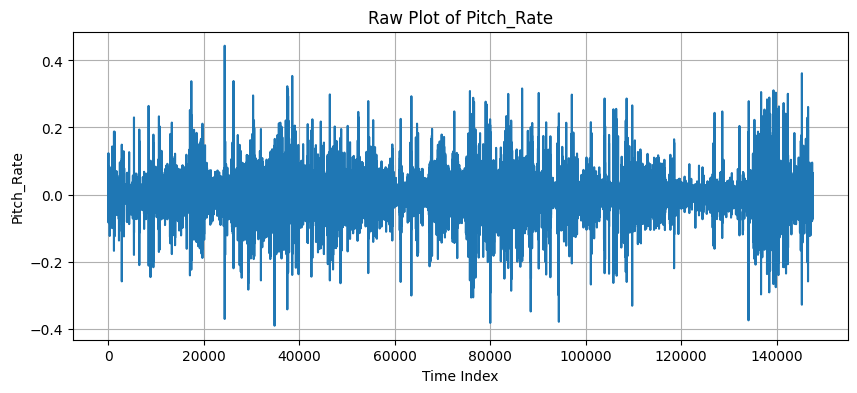

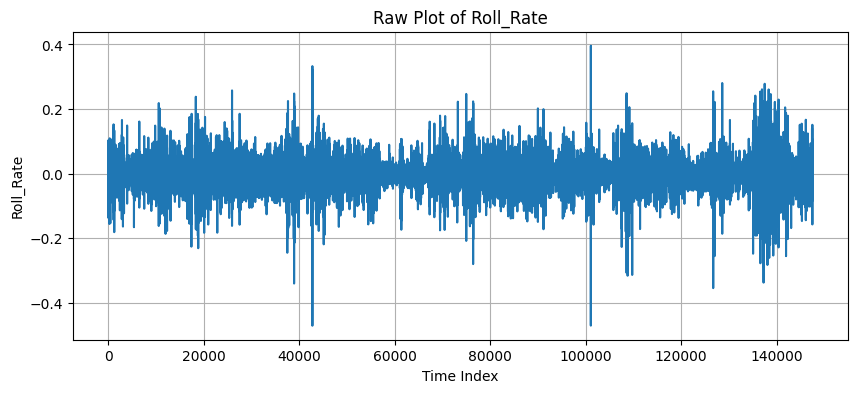

In [ ]:
import matplotlib.pyplot as plt

# Tumhare key columns (before cleaning or scaling)
features = ['Speed(m/s)', 'Long_Acc(m/s2)', 'Lat_Acc(m/s2)', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']

for col in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col])
    plt.title(f"Raw Plot of {col}")
    plt.xlabel("Time Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
#outlier detection

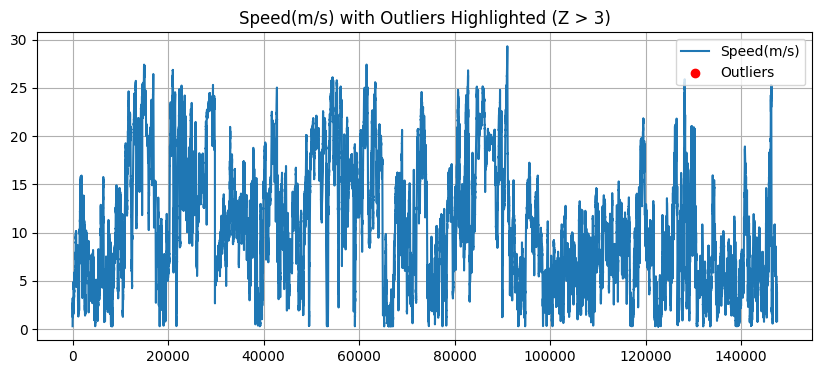

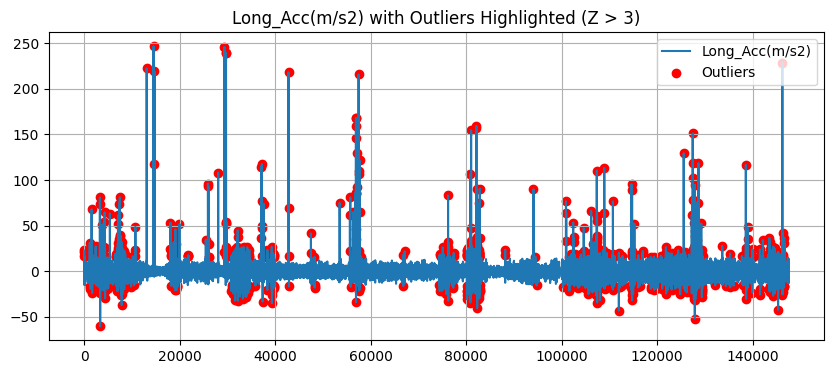

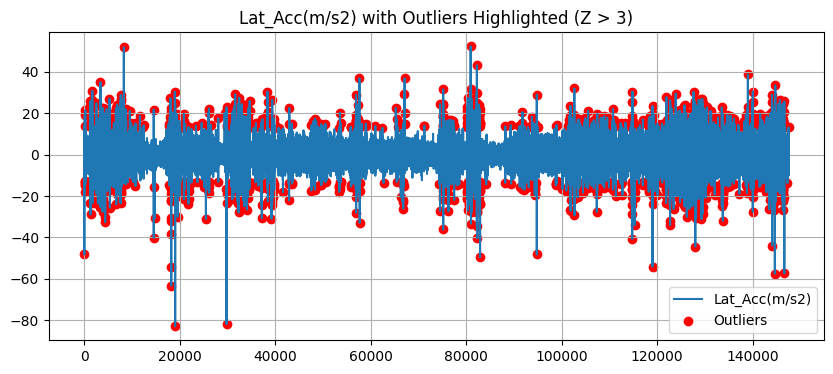

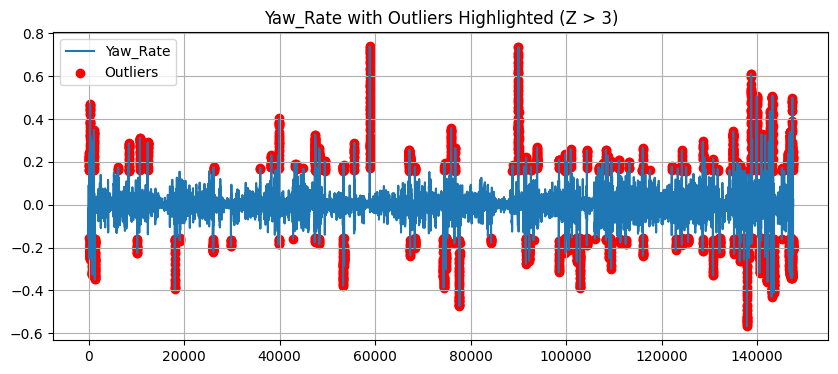

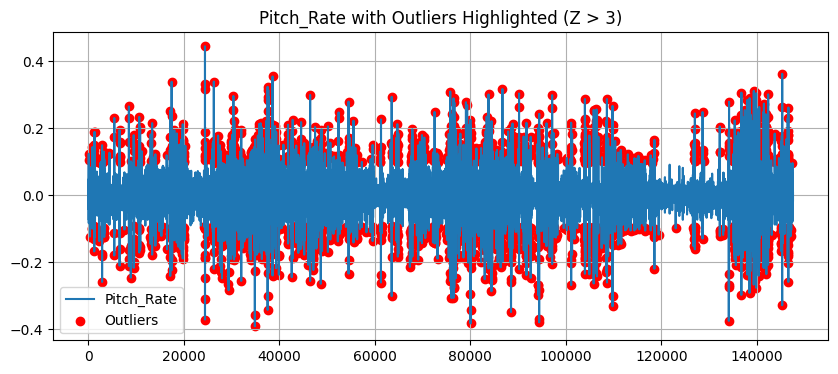

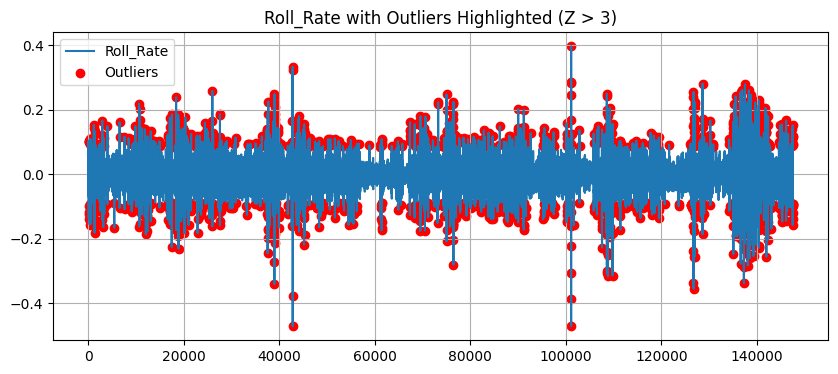

In [ ]:
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

# Tumhare features (after rename)
features = ['Speed(m/s)', 'Long_Acc(m/s2)', 'Lat_Acc(m/s2)', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']

# Z-score matrix
z = np.abs(zscore(df[features]))

# Plot each feature with outliers (z > 3)
for i, col in enumerate(features):
    outlier_mask = z[:, i] > 3
    plt.figure(figsize=(10, 4))
    plt.plot(df[col], label=col)
    plt.scatter(df.index[outlier_mask], df[col][outlier_mask],
                color='red', label='Outliers')
    plt.title(f"{col} with Outliers Highlighted (Z > 3)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from scipy.stats import zscore

z = np.abs(zscore(df[['Speed(m/s)']]))
print("Max Z-score in Speed:", z.max())

Max Z-score in Speed: 2.904148509312805


In [ ]:
df_raw=df.copy()

In [ ]:
df


,Speed(m/s),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,0.286111,0.1962,-0.2943,-0.018588,-0.002321,-0.009512,0.31,25°32.043560 N,84°51.020380 E
1,0.338889,0.7848,-0.2943,-0.020944,-0.000227,-0.012846,0.34,25°32.043600 N,84°51.020380 E
2,0.325000,0.1962,-0.4905,-0.026145,-0.000489,-0.010908,0.27,25°32.043620 N,84°51.020380 E
3,0.333333,0.3924,-0.0981,-0.037629,0.001344,-0.000017,0.83,25°32.043640 N,84°51.020390 E
4,0.361111,-0.2943,-0.2943,-0.045379,-0.004538,-0.007889,0.90,25°32.043690 N,84°51.020380 E
...,...,...,...,...,...,...,...,...,...
147559,1.438889,-3.7278,-7.6518,0.016790,0.001204,-0.029409,2.57,25°32.046080 N,84°51.027480 E
147560,1.402778,-3.0411,1.1772,-0.003718,-0.018535,-0.008954,5.00,25°32.046000 N,84°51.027460 E
147561,1.150000,-2.6487,-0.1962,0.013526,-0.015027,0.006999,2.58,25°32.045930 N,84°51.027430 E
147562,1.000000,-0.6867,0.0000,0.003299,-0.011397,0.032917,2.41,25°32.045880 N,84°51.027430 E


In [ ]:
df_raw

,Speed(m/s),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,0.286111,0.1962,-0.2943,-0.018588,-0.002321,-0.009512,0.31,25°32.043560 N,84°51.020380 E
1,0.338889,0.7848,-0.2943,-0.020944,-0.000227,-0.012846,0.34,25°32.043600 N,84°51.020380 E
2,0.325000,0.1962,-0.4905,-0.026145,-0.000489,-0.010908,0.27,25°32.043620 N,84°51.020380 E
3,0.333333,0.3924,-0.0981,-0.037629,0.001344,-0.000017,0.83,25°32.043640 N,84°51.020390 E
4,0.361111,-0.2943,-0.2943,-0.045379,-0.004538,-0.007889,0.90,25°32.043690 N,84°51.020380 E
...,...,...,...,...,...,...,...,...,...
147559,1.438889,-3.7278,-7.6518,0.016790,0.001204,-0.029409,2.57,25°32.046080 N,84°51.027480 E
147560,1.402778,-3.0411,1.1772,-0.003718,-0.018535,-0.008954,5.00,25°32.046000 N,84°51.027460 E
147561,1.150000,-2.6487,-0.1962,0.013526,-0.015027,0.006999,2.58,25°32.045930 N,84°51.027430 E
147562,1.000000,-0.6867,0.0000,0.003299,-0.011397,0.032917,2.41,25°32.045880 N,84°51.027430 E


In [ ]:
from scipy.stats import zscore
import numpy as np

features = ['Speed(m/s)', 'Long_Acc(m/s2)', 'Lat_Acc(m/s2)', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']
z = np.abs(zscore(df[features]))

# Filter: Keep only rows where z < 3 in all features
df_clean = df[(z < 3).all(axis=1)].copy()

In [ ]:
df_clean

,Speed(m/s),Long_Acc(m/s2),Lat_Acc(m/s2),Yaw_Rate,Pitch_Rate,Roll_Rate,Radius_of_turn,Latitude,Longitude
0,0.286111,0.1962,-0.2943,-0.018588,-0.002321,-0.009512,0.31,25°32.043560 N,84°51.020380 E
1,0.338889,0.7848,-0.2943,-0.020944,-0.000227,-0.012846,0.34,25°32.043600 N,84°51.020380 E
2,0.325000,0.1962,-0.4905,-0.026145,-0.000489,-0.010908,0.27,25°32.043620 N,84°51.020380 E
3,0.333333,0.3924,-0.0981,-0.037629,0.001344,-0.000017,0.83,25°32.043640 N,84°51.020390 E
4,0.361111,-0.2943,-0.2943,-0.045379,-0.004538,-0.007889,0.90,25°32.043690 N,84°51.020380 E
...,...,...,...,...,...,...,...,...,...
147559,1.438889,-3.7278,-7.6518,0.016790,0.001204,-0.029409,2.57,25°32.046080 N,84°51.027480 E
147560,1.402778,-3.0411,1.1772,-0.003718,-0.018535,-0.008954,5.00,25°32.046000 N,84°51.027460 E
147561,1.150000,-2.6487,-0.1962,0.013526,-0.015027,0.006999,2.58,25°32.045930 N,84°51.027430 E
147562,1.000000,-0.6867,0.0000,0.003299,-0.011397,0.032917,2.41,25°32.045880 N,84°51.027430 E


In [ ]:
print("Original rows:", df.shape[0])
print("Cleaned rows :", df_clean.shape[0])

Original rows: 147564
Cleaned rows : 136680


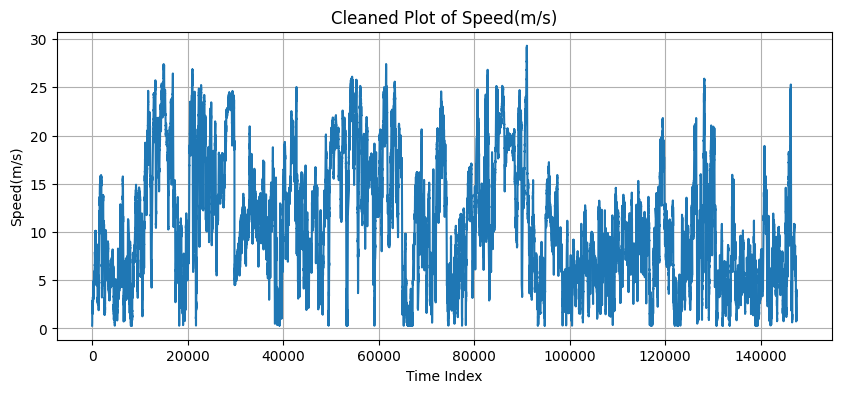

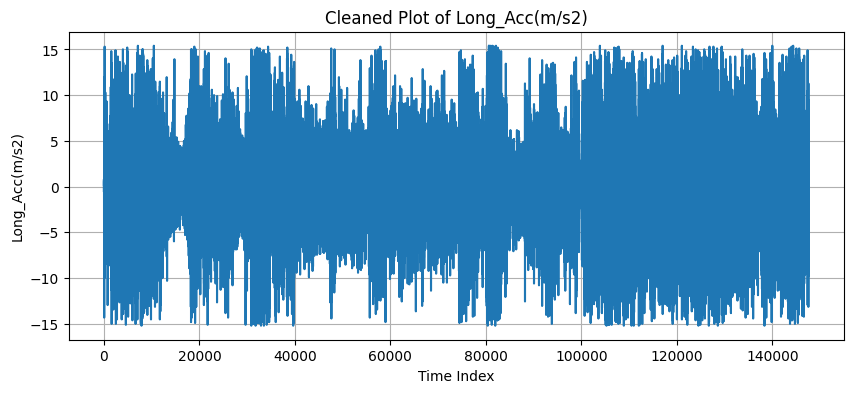

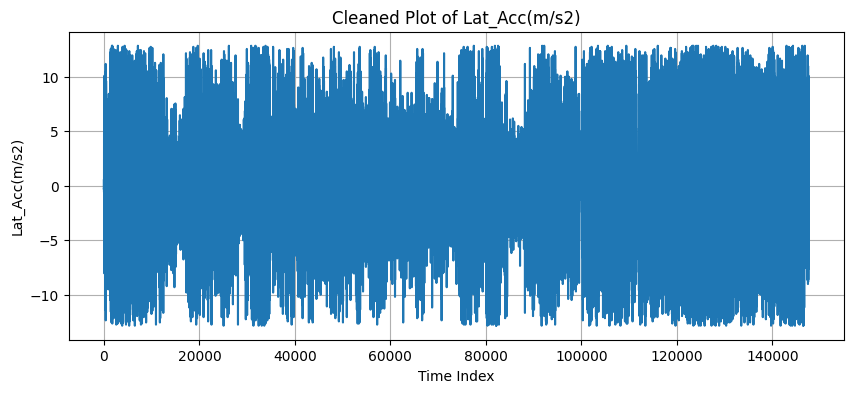

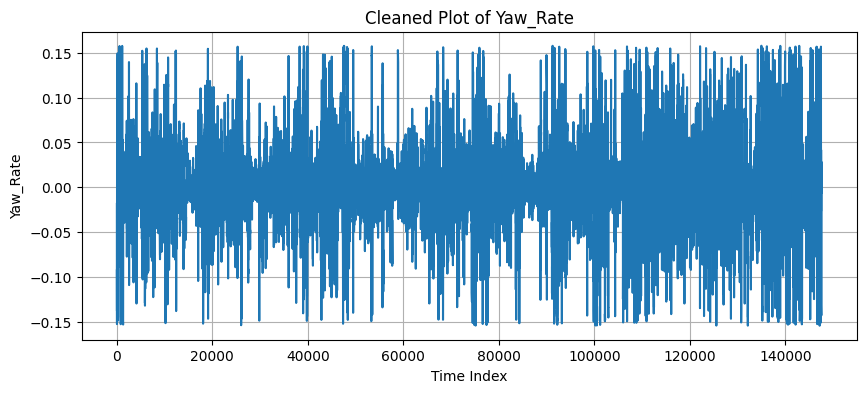

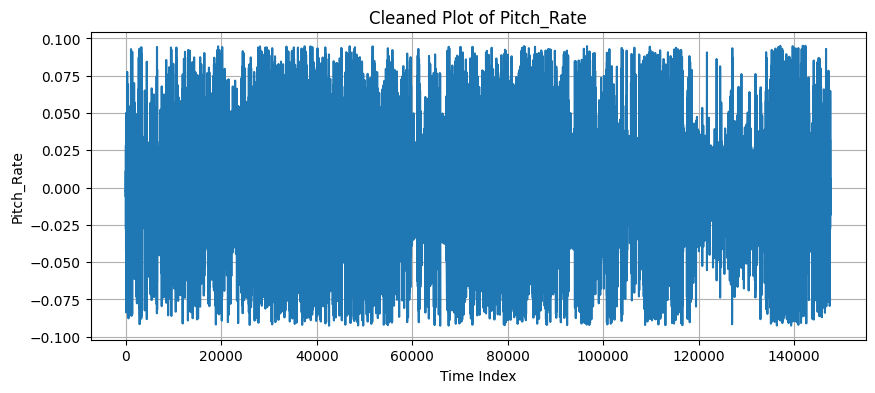

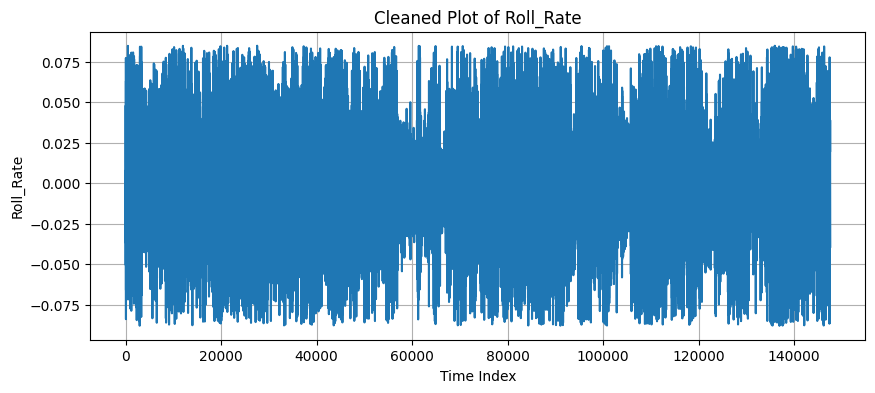

In [ ]:
import matplotlib.pyplot as plt

# Tumhare main features
features = ['Speed(m/s)', 'Long_Acc(m/s2)', 'Lat_Acc(m/s2)', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']

for col in features:
    plt.figure(figsize=(10, 4))
    plt.plot(df_clean[col])
    plt.title(f"Cleaned Plot of {col}")
    plt.xlabel("Time Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Feature list
features = ['Speed(m/s)', 'Long_Acc(m/s2)', 'Lat_Acc(m/s2)', 'Yaw_Rate', 'Pitch_Rate', 'Roll_Rate']

# Step 2: Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Step 3: Also scale Speed separately for inverse_transform after prediction
speed_scaler = StandardScaler()
df_scaled['Speed(m/s)'] = speed_scaler.fit_transform(df_clean[['Speed(m/s)']])

In [ ]:
import numpy as np

def create_lstm_sequences(data, feature='Speed(m/s)', l=60, d=30):
    X, y = [], []
    values = data[feature].values

    for i in range(l + d, len(values)):
        X.append(values[i - l - d:i - d])
        y.append(values[i])

    return np.array(X), np.array(y)

# Call function with df_scaled
X_lstm, y_lstm = create_lstm_sequences(df_scaled, feature='Speed(m/s)', l=60, d=30)

print("X shape:", X_lstm.shape)
print("y shape:", y_lstm.shape)

X shape: (136590, 60)
y shape: (136590,)


In [ ]:
# reshape to (samples, timesteps, features)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_lstm, y_lstm,
    validation_split=0.2,
    epochs=500,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 171s 194ms/step - loss: 0.5126 - val_loss: 0.0989
Epoch 2/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 208s 202ms/step - loss: 0.0903 - val_loss: 0.0918
Epoch 3/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 203s 202ms/step - loss: 0.0830 - val_loss: 0.0906
Epoch 4/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 201s 201ms/step - loss: 0.0789 - val_loss: 0.0887
Epoch 5/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 172s 201ms/step - loss: 0.0785 - val_loss: 0.0894
Epoch 6/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 202s 201ms/step - loss: 0.0775 - val_loss: 0.1031
Epoch 7/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 208s 208ms/step - loss: 0.0766 - val_loss: 0.0855
Epoch 8/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 197s 202ms/step - loss: 0.0763 - val_loss: 0.0863
Epoch 9/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 208s 210ms/step - loss: 0.0763 - val_loss: 0.0851
Epoch 10/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 172s 201ms/step - loss: 0.0752 - val_loss: 0.0855
Epoch 11/500
854/854 ━━━━━━━━━━━━━━━━━━━━ 179s 210ms/step - loss: 0.0751 - val_loss: 0.08

In [ ]:

y_pred = model.predict(X_lstm)

4269/4269 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step


In [ ]:
# y_pred and y_lstm are in normalized Z-score form

y_pred_real = speed_scaler.inverse_transform(y_pred)
y_true_real = speed_scaler.inverse_transform(y_lstm.reshape(-1, 1))

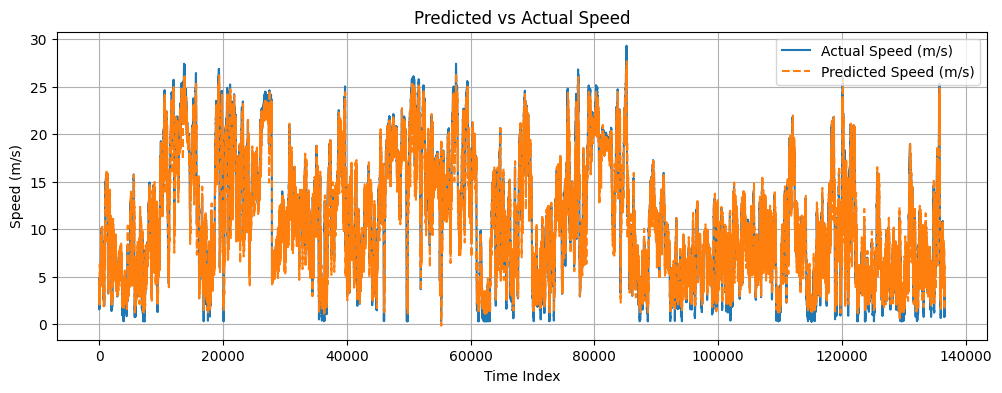

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y_true_real, label='Actual Speed (m/s)')
plt.plot(y_pred_real, label='Predicted Speed (m/s)', linestyle='--')
plt.title("Predicted vs Actual Speed")
plt.xlabel("Time Index")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

residuals = (y_true_real - y_pred_real) ** 2
RMSR = np.sqrt(residuals)

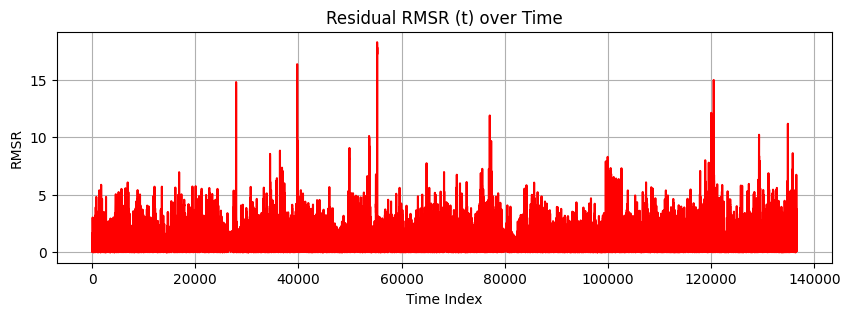

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(RMSR, color='red')
plt.title("Residual RMSR (t) over Time")
plt.xlabel("Time Index")
plt.ylabel("RMSR")
plt.grid(True)
plt.show()

In [ ]:
# Parameters
thr = 5.0        # Threshold for RMSR
rate = 0.4       # Required fraction
neigh = 10       # Window size

# Sliding window abnormal detection
abnormal_flags = np.zeros(len(RMSR))

for i in range(len(RMSR) - neigh):
    window = RMSR[i:i+neigh]
    count_above_thr = np.sum(window > thr)
    if count_above_thr / neigh > rate:
        abnormal_flags[i + neigh // 2] = 1  # mark center point of window

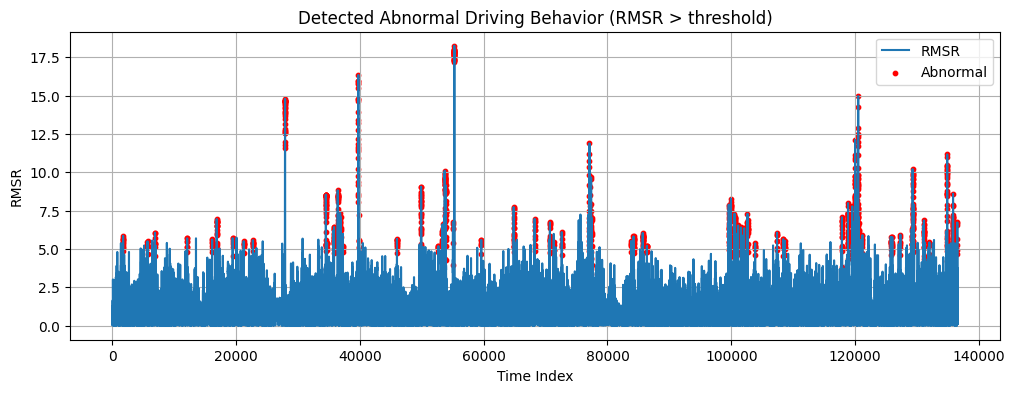

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(RMSR, label='RMSR')
plt.scatter(np.where(abnormal_flags==1), RMSR[abnormal_flags==1],
            color='red', label='Abnormal', s=10)
plt.title("Detected Abnormal Driving Behavior (RMSR > threshold)")
plt.xlabel("Time Index")
plt.ylabel("RMSR")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_true_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_true_real, y_pred_real))
r2 = r2_score(y_true_real, y_pred_real)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  1.2590
RMSE: 1.6834
R²:   0.9298


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_true_real, y_pred_real))
r2 = r2_score(y_true_real, y_pred_real)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  1.2590
RMSE: 1.6834
R²:   0.9298


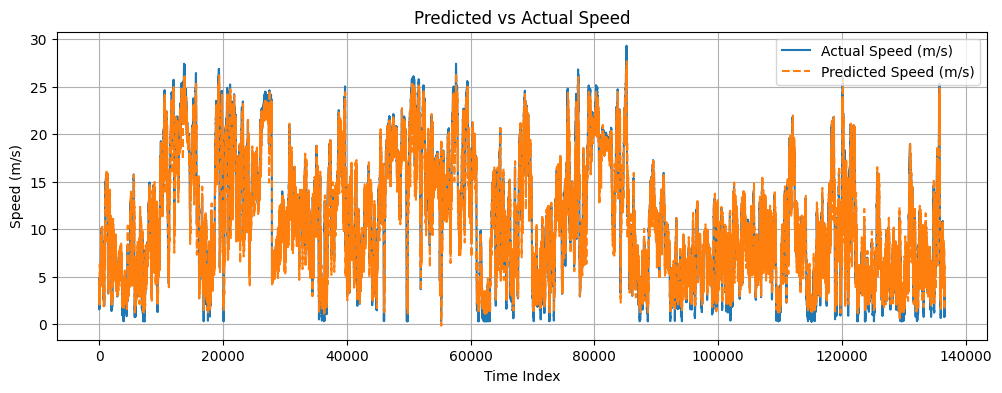

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_true_real, label='Actual Speed (m/s)')
plt.plot(y_pred_real, label='Predicted Speed (m/s)', linestyle='--')
plt.title("Predicted vs Actual Speed")
plt.xlabel("Time Index")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.grid(True)
plt.savefig("Predicted_vs_Actual_Speed.png", dpi=300)  # ✅ SAVE
plt.show()

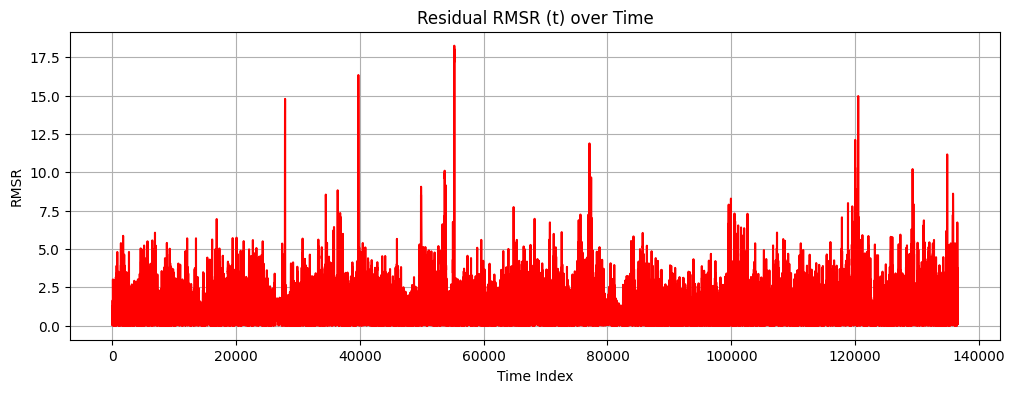

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(RMSR, color='red')
plt.title("Residual RMSR (t) over Time")
plt.xlabel("Time Index")
plt.ylabel("RMSR")
plt.grid(True)
plt.savefig("RMSR_Residuals.png", dpi=300)  # ✅ SAVE
plt.show()

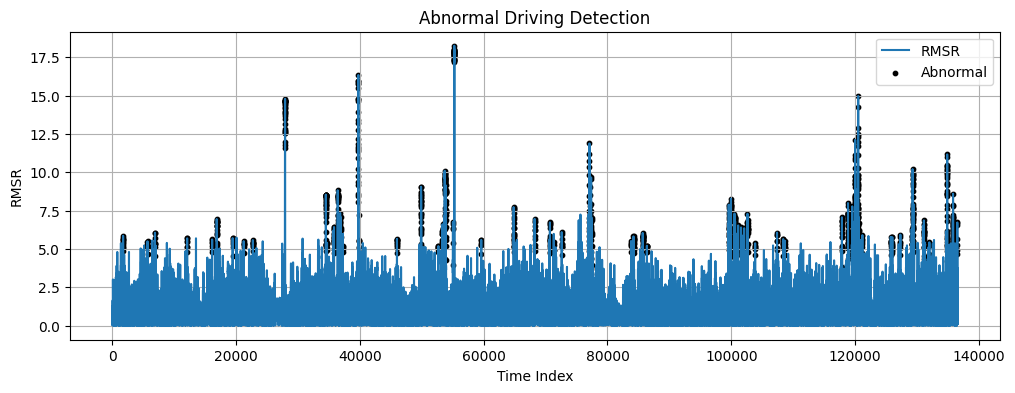

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(RMSR, label='RMSR')
plt.scatter(np.where(abnormal_flags==1), RMSR[abnormal_flags==1],
            color='black', label='Abnormal', s=10)
plt.title("Abnormal Driving Detection")
plt.xlabel("Time Index")
plt.ylabel("RMSR")
plt.legend()
plt.grid(True)
plt.savefig("Abnormality_Detection.png", dpi=300)  # ✅ SAVE
plt.show()

In [ ]:
import pandas as pd

abnormal_times = pd.DataFrame({'Time_Index': np.where(abnormal_flags == 1)[0]})
abnormal_times.to_csv("Abnormal_Timestamps.csv", index=False)